In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


The dataset is based on:
    
    Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C. and Johannes, R.S., 1988, November. Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the annual symposium on computer application in medical care (p. 261). American Medical Informatics Association.

In [ ]:
Exploratory Data Analysis

In [60]:
df = pd.read_csv("diabetes.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Descriptive Statistics

In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
df.duplicated().sum()

0

Data Visualisation for the categorical variable "Outcome"

In [63]:
diabetes = df['Outcome'].value_counts()
diabetes


0    500
1    268
Name: Outcome, dtype: int64

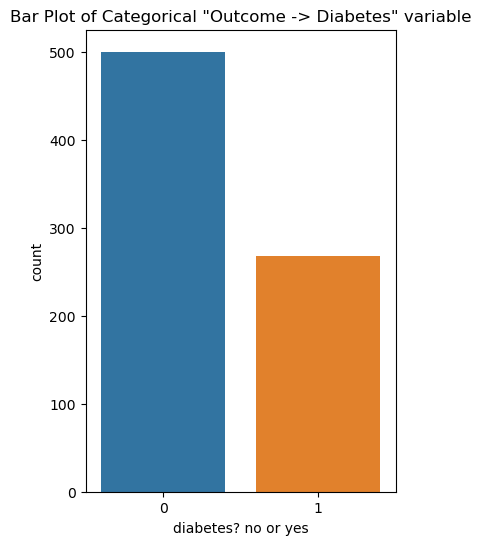

In [64]:
plt.figure(figsize=(4, 6))


sns.countplot(x='Outcome',data=df)

plt.title('Bar Plot of Categorical "Outcome -> Diabetes" variable')
plt.xlabel('diabetes? no or yes')
plt.ylabel('count')

plt.show()


Visualisation of each IV using boxplots

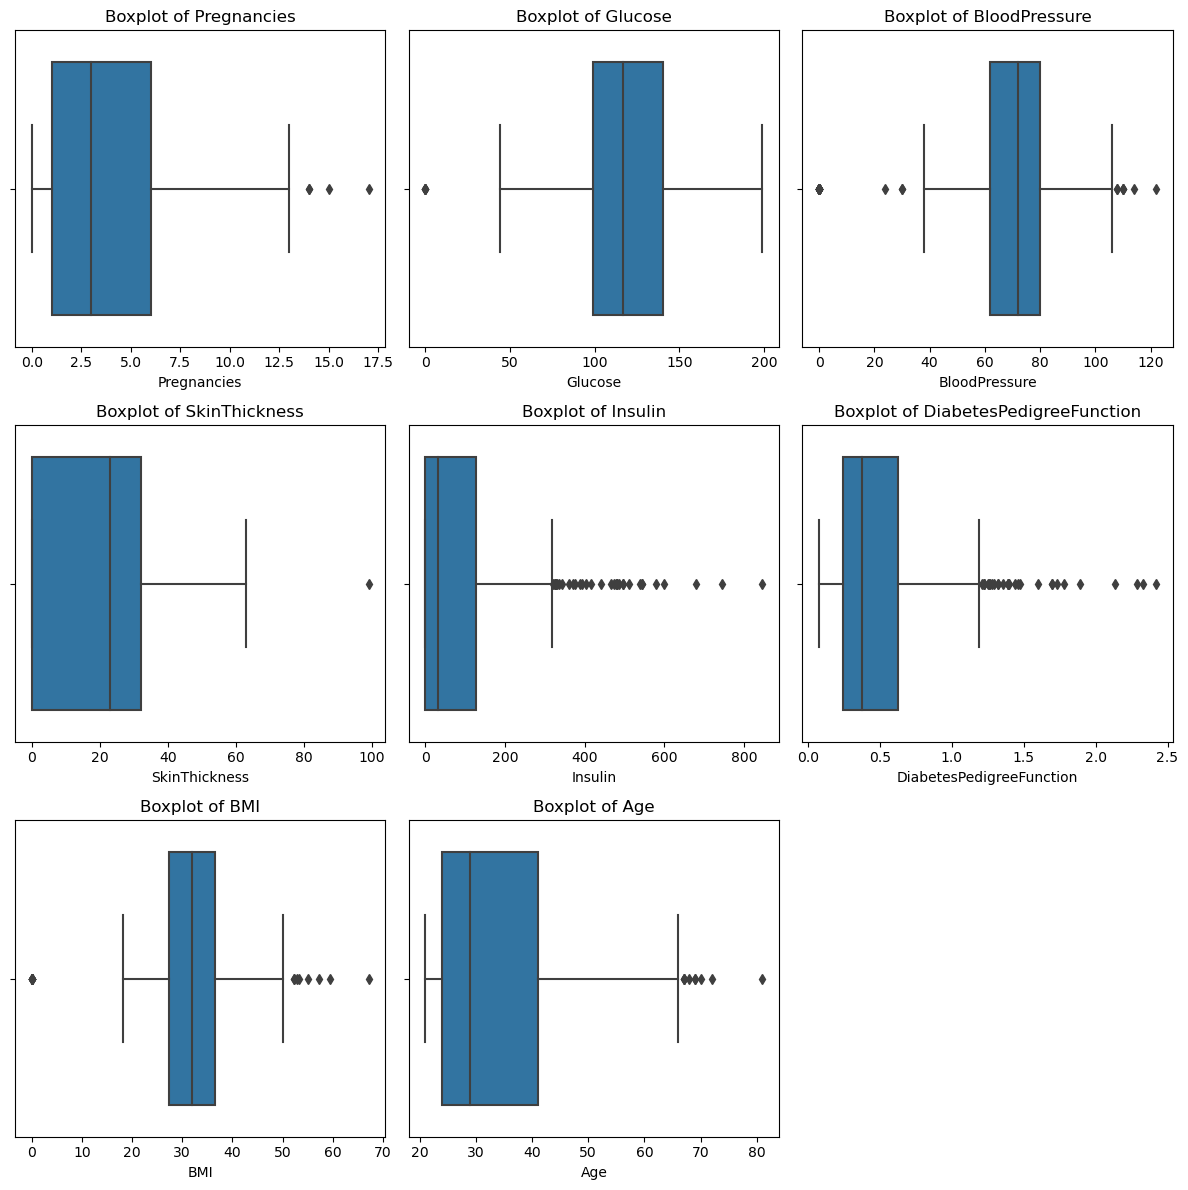

In [65]:
import matplotlib.pyplot as plt                                                                   
import seaborn as sns                            
plt.figure(figsize=(12, 12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI', 'Age']):
    plt.subplot(3, 3, i + 1)                                                                
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  # Adjusting layout to prevent overlapping
plt.show()


Boxplot interpretation

Pregnancies:
- The median is ~3
- slightly right-skewed with outliers from ~13 pregnancies

Glucose:
- The median lies around ~115-120
- There are outliers to the left, slightly left-skewed

BloodPressure
- The IQR seems narrower compared to both variables pregnancies and glucose
- The median is ~75
- It is slightly left-skewed

SkinThickness

- Median is ~23
- Outlier at 100
- Values are ranging in the lower / minimum range

Insulin:

- Data is disperse: Median lies ~30
- Outliers from behind ~300
- Most data (mean) is ranged at the minimum


DiabetesPedigreeFunction

- Outliers from ~1.2

BMI

- Median ~32
- Outliers from ~52 on

Age

- Participants' median age ~28
- Most values range from 24-42
- Outliers are from ~67 until ~80

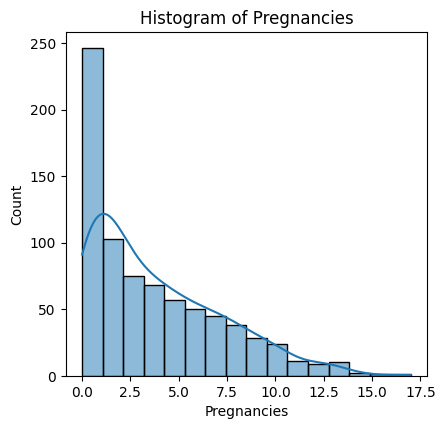

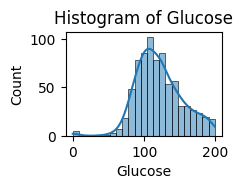

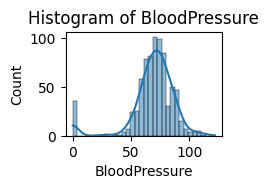

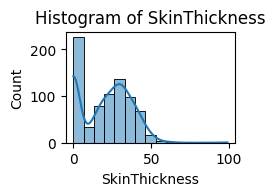

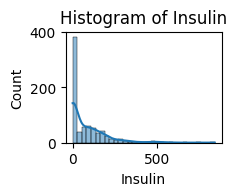

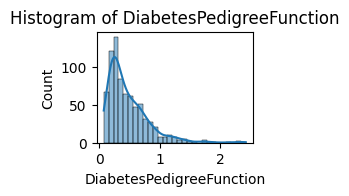

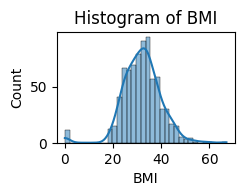

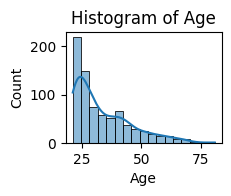

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI', 'Age']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data = df, x = col,kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()  # Adjusting layout to prevent overlapping
    plt.show()

Correlation analysis

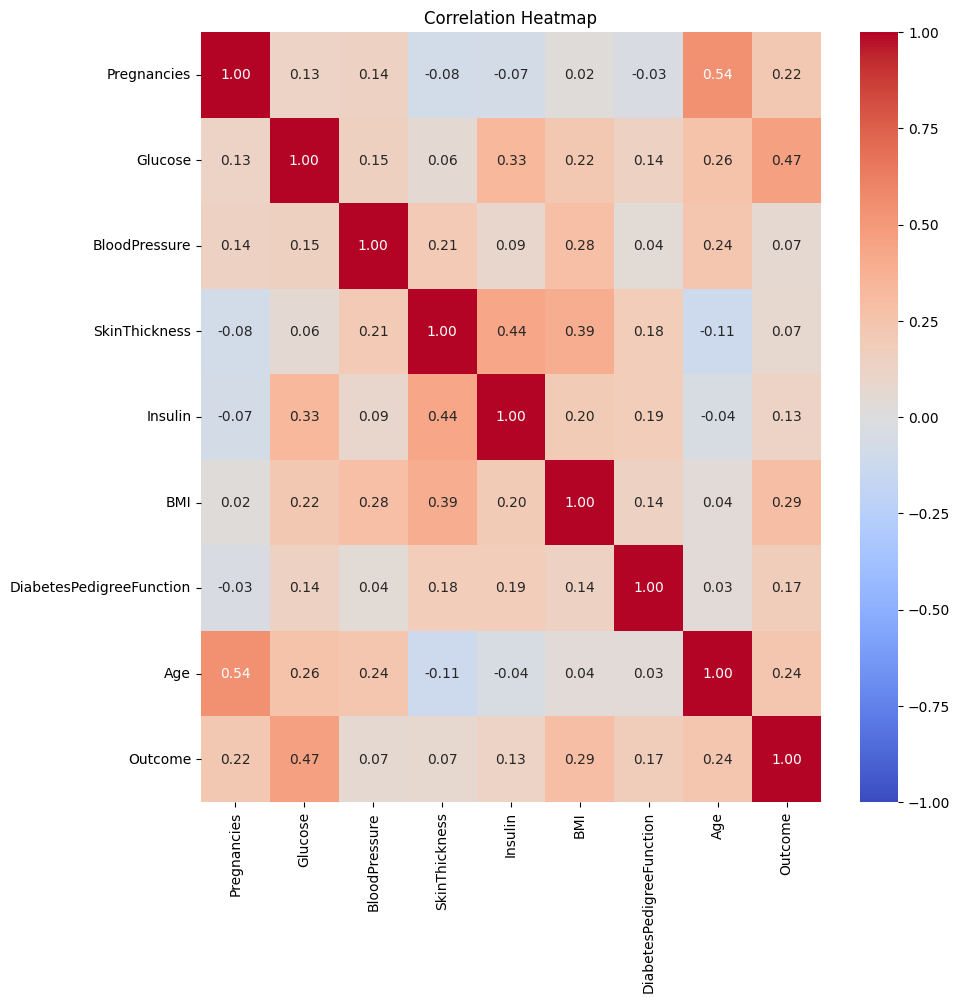

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), vmin=-1.0, center=0, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Heatmap interpretation

Glucose and outcome (diabetes) show a moderate positive relation of 0.47, followed by BMI (0.29) and age (0.24) with diabetes indicating a positive weak relationship. BloodPressure, SkinThickness show the weakest positive relation (0.07) with diabetes, followed by insulin (0.13).


Data scaling using StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

#Creating "X" with standardised features and dropping target column "Outcome"
X_standard = pd.DataFrame(sc_X.fit_transform(df.drop(['Outcome'], axis = 1)), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI', 'Age'])

X_standard.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Data scaling using MinMaxScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler_X = MinMaxScaler()

X_MinMax = pd.DataFrame(MinMaxScaler_X.fit_transform(df.drop(['Outcome'], axis = 1)), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI', 'Age'])

X_MinMax.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


Defining the target variable "Outcome"

In [ ]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Split a dataset into training and testing sets for machine learning

80% will be training data and 20% will be test data

Note: Given the two Scalers (StandardScaler() and MinMaxScaler()) used, both will be used.
The goal is to try both scalers and see which one yields better results in terms of model performance.

Train test split using StandardScaler() variables

In [ ]:
from sklearn.model_selection import train_test_split

SX_train, SX_test, Sy_train, Sy_test = train_test_split(X_standard, y, test_size = 0.2, random_state = 0)
SX_train, SX_test, Sy_train, Sy_test


Traintestsplit with the MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split

MMX_train, MMX_test, MMy_train, MMy_test = train_test_split(X_MinMax, y, test_size = 0.2, random_state = 0)
MMX_train, MMX_test, MMy_train, MMy_test

(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
 603     0.411765  0.753769       0.639344       0.292929  0.148936   
 118     0.235294  0.487437       0.491803       0.232323  0.000000   
 247     0.000000  0.829146       0.737705       0.333333  0.803783   
 157     0.058824  0.547739       0.459016       0.212121  0.159574   
 468     0.470588  0.603015       0.000000       0.000000  0.000000   
 ..           ...       ...            ...            ...       ...   
 763     0.588235  0.507538       0.622951       0.484848  0.212766   
 192     0.411765  0.798995       0.540984       0.000000  0.000000   
 629     0.235294  0.472362       0.532787       0.222222  0.000000   
 559     0.647059  0.427136       0.606557       0.000000  0.000000   
 684     0.294118  0.683417       0.672131       0.000000  0.000000   
 
      DiabetesPedigreeFunction       BMI       Age  
 603                  0.524590  0.262169  0.550000  
 118                  0.420268  0.155850

Models with the StandardScaler dataset

Logistic Regression with StandardScaler dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(SX_train, Sy_train)

lg.score(SX_train, Sy_train) #0.762214983713355

0.762214983713355

Logistic Regression model with StandardSclaer Variables Summary

The training logistic regression model  achieved an accuracy of around 76.22% on the dataset with a StandardScore. An accuracy of 0.762 implies that roughly 76.22% of the predictions made by the logistic regression model were correct when compared to the true labels in the dataset. In other words, out of all the samples in the dataset, the model correctly predicted the class (or category) of approximately 76.22% of them. This accuracy score provides a measure of how well the logistic regression model is performing on the given data, but it doesn't provide insight into how the model might perform on unseen data or if it's overfitting to the training data. Overall, an accuracy score of 0.762 suggests that the logistic regression model is making reasonably accurate predictions on the dataset it was evaluated on, but further evaluation on a separate validation or test set would be beneficial to assess its generalization performance.

In [ ]:
lg.score(SX_test, Sy_test)

0.8246753246753247

Model predictions on test data

In [ ]:
from sklearn.metrics import accuracy_score
Sy_prediction = lg.predict(SX_test)
print(accuracy_score(Sy_test, Sy_prediction)) #0.8246753246753247

0.8116883116883117


Logistic Regression Model using MinMaxScaler dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(MMX_train, MMy_train)

lg.score(MMX_train, MMy_train) #0.758957654723127 -> score is about the same as StandardScaler()

0.758957654723127

Testing the score on test data of StandardScore

In [ ]:
lg.score(MMX_test, MMy_test) # 0.8181818181818182

0.8181818181818182

Model predictions on test data

In [ ]:
from sklearn.metrics import accuracy_score
MMy_prediction = lg.predict(MMX_test)
print(accuracy_score(MMy_test, MMy_prediction)) #0.8181818181818182

0.8181818181818182


Scaling Interpretation: Both scales show roughly the same results

Confusion Matrix for Logistic Regression using MinMaxScaler Dataset

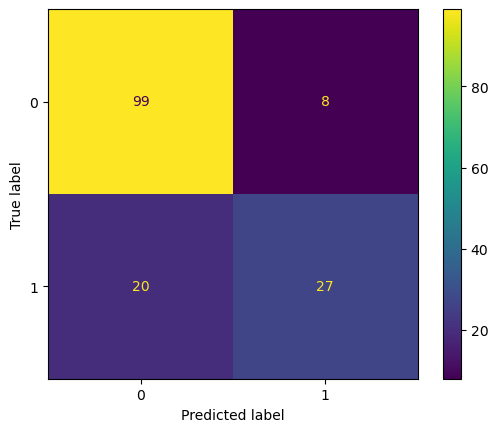

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(MMy_test, MMy_prediction)
confusion_matrix = MMy_test, MMy_prediction

Confusion Matrix for Logistic Regression using StandardScaler dataset

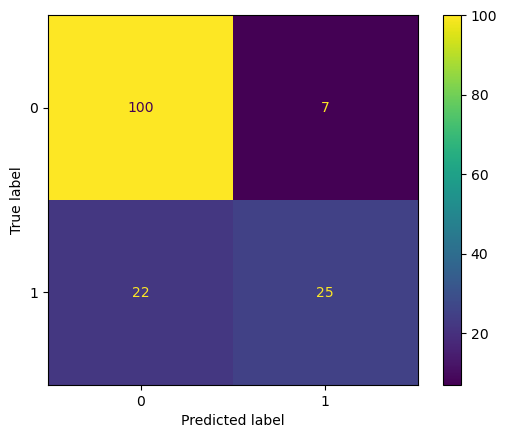

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Sy_test, Sy_prediction)
confusion_matrix = Sy_test, Sy_prediction


Classification Report for MinMaxScaler

In [72]:
from sklearn.metrics import classification_report

print(classification_report(MMy_test, MMy_prediction))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154



Confusion Matrix Interpretation:

- Precision: Out of all participants the model predicted would get diabetes, 77% did.
-Recall: All participants that would get diabetes,
- F1-Score: Taking the weighted average F1-score, the model shows that 81% of positive predictions were correct.
- Support: 0 occurs 107 times whereas, whereas class 1 counts 47 cases, demonstrating the The difference of 60 cases an imbalanced dataset.
